In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MCsample(P, init_dist, k): 
    """
    sample a 'k'-step Markov chain 
    with initial distribution 'init_dist'
    and transition probabilities 'P'
    """
    s = len(init_dist) # num of states
    X = np.zeros(k)
    X[0] = np.random.choice(s, p=init_dist)
    for i in range(1, k):
        X[i] = np.random.choice(s, p=P[int(X[i-1]), :])
    return X


In [4]:
N = 100000
mu = 0.2
probs = np.zeros((N, 2))
X = np.zeros(N)
for n in range(N):
    probs[n] = np.array([1/2 + mu/(2*np.sqrt(n+1)), 1/2 - mu/(2*np.sqrt(n+1))])
    X[n] = np.random.choice([1, -1], p=probs[n])
S = np.cumsum(X)

In [5]:
def ScaledPartialSum(S, t):
    idx = int(np.floor(10000*t))
    return S[idx]/np.sqrt(10000)

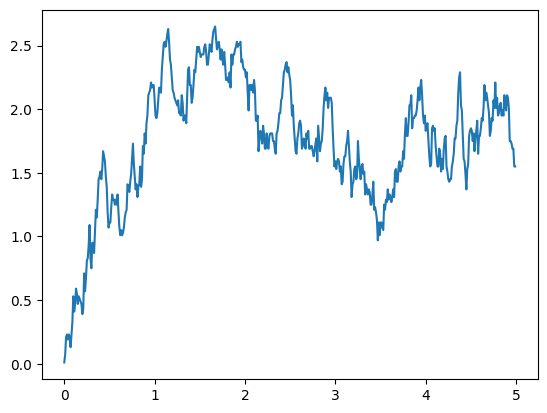

In [6]:
tl = np.arange(0, 5, 0.01)
bm = np.zeros(np.shape(tl))
for i in range(len(tl)):
    bm[i] = ScaledPartialSum(S, tl[i])
plt.plot(tl, bm)
plt.show()

In [7]:
class DDModel(object):
    def __init__(self, mu=1, sigma=1) -> None:
        self.mu = mu
        self.sigma = sigma

    def strong_Euler(self, init_cond, T, N=1000):
        t0, u0 = init_cond
        dt = float(T - t0) / N
        t_grid = np.arange(t0, T + dt, dt)
        u_grid = np.zeros(N + 1)
        u_grid[0] = u0
        for i in range(1, N + 1):
            t = t0 + (i - 1) * dt
            u = u_grid[i - 1]
            dW = np.random.normal(loc=0.0, scale=np.sqrt(dt))
            u_grid[i] = u + self.mu * dt + self.sigma * dW
        return t_grid, u_grid
    
    def weak_Euler(self, init_cond, T, N=1000):
        # dt = T/N; dx = 
        # N: num of time steps, N^2: num of space steps
        t0, u0 = init_cond
        dt = float(T - t0) / N
        t_grid = np.arange(t0, T + dt, dt)
        u_grid = np.zeros(N + 1)
        u_grid[0] = u0
        for i in range(1, N + 1):
            t = t0 + (i - 1) * dt
            u = u_grid[i - 1]
            dW_ = (2*(np.random.uniform() < 0.5)-1) * np.sqrt(dt)
            u_grid[i] = u + self.mu * dt + self.sigma * dW_
        return t_grid, u_grid

    

#### drift-diffusion model:
$\mathrm{d}X(t)=\mu\mathrm{d}t+\sigma\mathrm{d}W(t)$
#### strong Euler scheme:
$X_{k+1}=X_k+\mu\Delta t+\sigma\Delta W_k$, where $\Delta W_k\sim\mathcal{N}(0, \Delta t)$
#### weak Euler scheme:
$X_{k+1}=X_k+\mu\Delta t+\sigma\xi_k \sqrt{\Delta t}$, where $\xi_k$ takes value $\pm 1$ with probability $\tfrac{1}{2}$ each.

For Brownian motion $\mathrm{d}X(t)=\sigma\mathrm{d}W(t)$, the weak Euler scheme gives $X_{k+1}=X_k+\sigma\xi_k \sqrt{\Delta t}$, so we can discretize the space with step size $\Delta x=\sigma\sqrt{\Delta t}$, and we get a countable state (finite if space is bounded) Markov chain.

### Trying to construct a finite state Markov chain approximation to the general Ito's diffusion...

Define $Z_{k}$

In [8]:
ddm = DDModel(mu=0.2, sigma=1)
tl, ul = ddm.strong_Euler(init_cond=(0, 1), T=5)
tl2, ul2 = ddm.weak_Euler(init_cond=(0, 1), T=5)

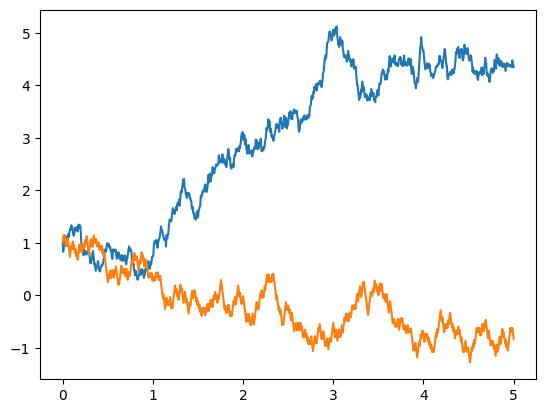

In [9]:
plt.plot(tl, ul)
plt.plot(tl2, ul2)
    

In [25]:
# standard Brownian motion
N_list = [100, 1000, 10000, 100000]
N = 10000
T = 1
a = 2
dt = T/N
dx = np.sqrt(dt)
J = int(a/dx)

X = np.random.choice([1, -1], size=N)
X1 = np.sum(X.reshape(-1, 10), axis=1)
S = np.cumsum(X)
S1 = np.cumsum(X)


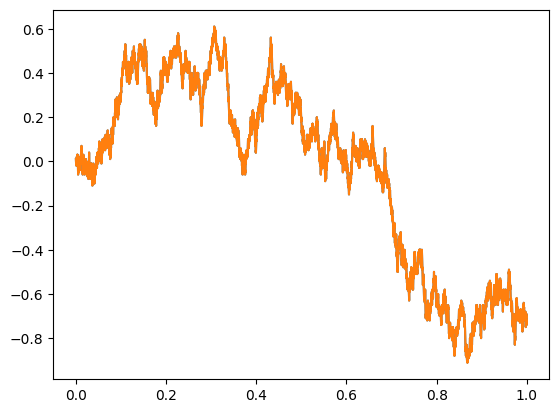

In [26]:
tl = np.arange(0, T, dt)
bm = np.zeros(np.shape(tl))
bm2 = np.zeros(np.shape(tl))
for i in range(len(tl)):
    bm[i] = ScaledPartialSum(S, tl[i])
    bm2[i] = ScaledPartialSum(S, tl[i])
plt.plot(tl, bm)
plt.plot(tl, bm2)
plt.show()

In [175]:
# set mu=0.2, sigma=1,
a = 2
T = 2
mu = 0.2
sigma = 1
dx = 0.001
dt = res.x*dx**2
N = int(T/dt)


p1 = ((mu ** 2 * dt ** 2 + sigma ** 2 * dt) / (dx ** 2) + mu * dt / dx) / 2
p2 = ((mu ** 2 * dt ** 2 + sigma ** 2 * dt) / (dx ** 2) - mu * dt / dx) / 2


In [176]:
p1, p2, 1-p1-p2

(array([0.49970061]), array([0.49950077]), array([0.00079862]))

In [177]:
(mu**2*dt**2+sigma**2*dt)/(dx**2)

array([0.99920138])

In [178]:
J = int(a/dx)
P = np.zeros((J+1, J+1))
P[0, 0] = 1
P[J, J] = 1
for i in range(1, J):
    P[i, i-1] = p2
    P[i, i]=1-p1-p2
    P[i, i+1] = p1

In [179]:
P

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.99500768e-01, 7.98624153e-04, 4.99700608e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.99500768e-01, 7.98624153e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.98624153e-04, 4.99700608e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.99500768e-01, 7.98624153e-04, 4.99700608e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [180]:
init_dist = np.zeros(J+1)
init_dist[7] = 1
X = MCsample(P, init_dist, N)
X = X * dx

In [181]:
idx = np.logical_and(X>0, X<a)

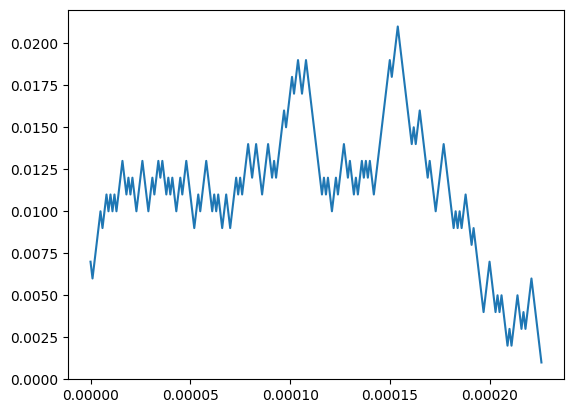

In [182]:
tl = np.arange(0, 2, dt)[:-1]
plt.plot(tl[idx], X[idx])
plt.show()

In [172]:
from scipy.optimize import NonlinearConstraint, Bounds, minimize, BFGS

def obj(alpha):
    return - alpha

def obj_jac(alpha):
    return - 1.0

def obj_hess(alpha):
    return 0.0


def cons_f(alpha):
    return mu ** 2 * dx ** 2 * alpha ** 2 +(sigma ** 2) * alpha

def cons_J(alpha):
    return 2 * mu ** 2 * dx ** 2 * alpha + sigma ** 2

def cons_H(alpha, v):
    return 2 * mu ** 2 * dx ** 2 * v


bounds = Bounds(0.0, 100.0)
nonlinear_constraint = NonlinearConstraint(cons_f, 0, 1, jac=cons_J, hess=BFGS())

alpha0 = 0.5
res = minimize(
    obj,
    alpha0,
    method="trust-constr",
    jac=obj_jac,
    hess=obj_hess,
    constraints=[nonlinear_constraint],
    options={"verbose": 1},
    bounds=bounds,
)


`gtol` termination condition is satisfied.
Number of iterations: 9, function evaluations: 6, CG iterations: 5, optimality: 8.27e-11, constraint violation: 0.00e+00, execution time: 0.012 s.


In [173]:
res.x

array([0.99920134])

In [174]:
mu ** 2 * dx ** 2 * res.x ** 2  +(sigma ** 2) * res.x


array([0.99920138])

In [138]:
(0.2**2) * (0.001**2) * (res.x**2) + res.x

array([0.99920138])

In [132]:
sigma

1